In [13]:
#A1
import pandas as pd 
import numpy as np
df = pd.read_excel(r"Lab Session Data.xlsx",sheet_name="Purchase data")
df.set_index('Customer', inplace=True)
df
df=df.iloc[0:10,0:4]
Candies= df["Candies (#)"]
Mangoes = df["Mangoes (Kg)"]
Milk_Packets = df["Milk Packets (#)"]
Payment = df["Payment (Rs)"]
A = np.column_stack((Candies, Mangoes, Milk_Packets))
C = Payment.values
pseudo_inv = np.linalg.pinv(A)
X = pseudo_inv.dot(C)
rank_A = np.linalg.matrix_rank(A)
print(A)
print("The dimensionality of the vector space is the rank of the matrix")
print("The number of vectors in this vector space are ",rank_A)
print("Rank of A:", rank_A)
print("The cost of each product are ",X,"respectively.")

[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
The dimensionality of the vector space is the rank of the matrix
The number of vectors in this vector space are  3
Rank of A: 3
The cost of each product are  [ 1. 55. 18.] respectively.


In [5]:
#A2
import pandas as pd
import numpy as np
file_path = r"Lab Session Data.xlsx"  
df = pd.read_excel(r"Lab Session Data.xlsx", sheet_name="Purchase data")
df.set_index('Customer', inplace=True)
df = df.iloc[0:10, 0:4]
A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
C = df['Payment (Rs)'].values
pseudo_inv = np.linalg.pinv(A)
X = pseudo_inv.dot(C)
print(f"The cost of each product is {X} respectively.")




The cost of each product is [ 1. 55. 18.] respectively.


In [10]:
#A3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the data
file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name='Purchase data')

# Mark customers as RICH or POOR
df['Customer Type'] = np.where(df['Payment (Rs)'] > 200, 'RICH', 'POOR')

# Prepare features and target variable
X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].fillna(0)  # Fill NaN values with 0
y = df['Customer Type']

# Encode categorical target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Adjust max_iter and handle class imbalance
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Display classification report with zero_division parameter
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=1))

# Check class distribution in the training and test sets
print("Class distribution in training set:")
print(pd.Series(y_train).value_counts())

print("Class distribution in test set:")
print(pd.Series(y_test).value_counts())


Classification Report:
              precision    recall  f1-score   support

        POOR       0.67      1.00      0.80         2
        RICH       1.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.83      0.50      0.40         3
weighted avg       0.78      0.67      0.53         3

Class distribution in training set:
1    5
0    2
Name: count, dtype: int64
Class distribution in test set:
0    2
1    1
Name: count, dtype: int64


In [14]:
#A4-A
import pandas as pd
import statistics

# Load the data
df_stock = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

# Extract the Price data
price_data = df_stock['Price'].dropna()

# Calculate mean and variance
mean_price = statistics.mean(price_data)
variance_price = statistics.variance(price_data)

print(f"Mean Price: {mean_price}")
print(f"Variance Price: {variance_price}")


Mean Price: 1560.663453815261
Variance Price: 58732.365352539186


In [15]:
#A4-B
# Convert 'Date' column to datetime
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

# Filter price data for Wednesdays
wednesdays = df_stock[df_stock['Date'].dt.day_name() == 'Wednesday']
wednesday_prices = wednesdays['Price']

# Calculate sample mean for Wednesdays
mean_wednesday_price = statistics.mean(wednesday_prices)

# Compare with population mean
print(f"Mean Price on Wednesdays: {mean_wednesday_price}")
print(f"Population Mean Price: {mean_price}")


Mean Price on Wednesdays: 1550.706
Population Mean Price: 1560.663453815261


In [25]:
#A4-C
import pandas as pd

# Correctly specify the path to your Excel file
file_path = r"Lab Session Data.xlsx"

# Load the Excel file into a DataFrame
try:
    df = pd.read_excel(file_path)
    print("File loaded successfully.")
    print(df.head())  # Display the first few rows to verify

    # Check if 'Date' column exists
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        print("Date column converted successfully.")

        # Extract April data
        april_data = df[df['Date'].dt.month == 4]
        print("April data extracted successfully.")
        print(april_data.head())

        # Check if 'Close' column exists
        if 'Close' in df.columns:
            april_prices = april_data['Close'].tolist()
            historical_prices = df['Close'].tolist()

            # Calculate the sample mean for April
            sample_mean_april = sum(april_prices) / len(april_prices)

            # Calculate the population mean from historical data
            population_mean = sum(historical_prices) / len(historical_prices)

            # Print the results
            print(f"Sample Mean for April: {sample_mean_april:.2f}")
            print(f"Population Mean: {population_mean:.2f}")

            # Compare the means
            if sample_mean_april > population_mean:
                print("The sample mean for April is higher than the population mean.")
            elif sample_mean_april < population_mean:
                print("The sample mean for April is lower than the population mean.")
            else:
                print("The sample mean for April is equal to the population mean.")
        else:
            print("'Close' column not found.")
    else:
        print("'Date' column not found.")

except Exception as e:
    print(f"Error: {e}")


File loaded successfully.
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          NaN          NaN          NaN    

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   o

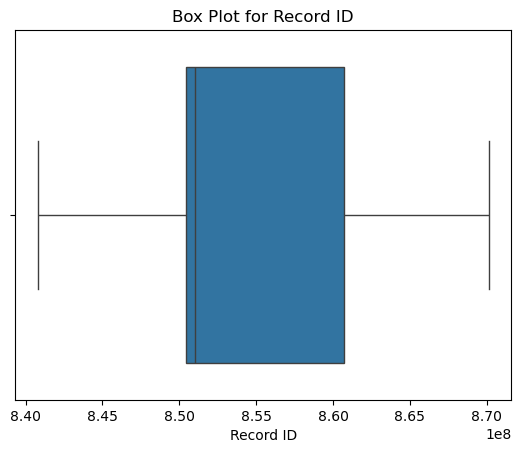

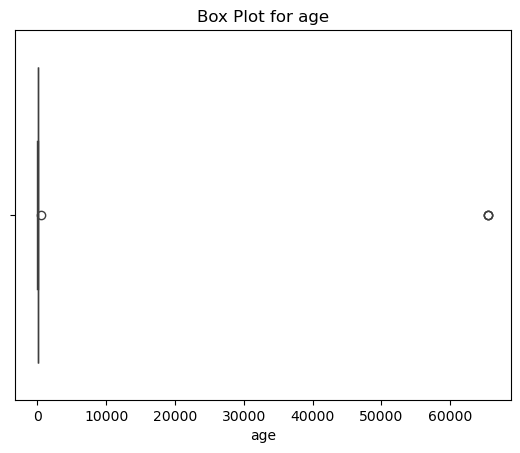


Mean of Numeric Columns:
Record ID    8.529473e+08
age          7.355582e+01
dtype: float64

Variance of Numeric Columns:
Record ID    5.748625e+13
age          1.401801e+06
dtype: float64

Standard Deviation of Numeric Columns:
Record ID    7.581969e+06
age          1.183977e+03
dtype: float64


In [26]:
#A5
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the file
file_path = r'Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
    
    # Display basic information about the dataset
    print("Basic Information:")
    print(df.info())
    print("\nFirst few rows of the dataset:")
    print(df.head())

    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("\nCategorical Columns:")
    print(categorical_cols)

    # Check unique values in each categorical column
    print("\nUnique values in categorical columns:")
    for col in categorical_cols:
        print(f"{col}: {df[col].unique()}")

    # Determine encoding scheme
    # For demonstration purposes, assuming ordinal variables are identified manually
    # Example: Assuming 'Education Level' is ordinal and others are nominal
    ordinal_cols = ['Education Level']  # Example list
    nominal_cols = list(set(categorical_cols) - set(ordinal_cols))
    print("\nOrdinal Columns:")
    print(ordinal_cols)
    print("\nNominal Columns:")
    print(nominal_cols)

    # Data range for numeric variables
    print("\nNumeric Data Range:")
    print(df.describe())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Identify outliers using IQR method
    numeric_cols = df.select_dtypes(include=['number']).columns
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
    print("\nOutliers count:")
    print(outliers.sum())

    # Box plots for numeric columns to visualize outliers
    print("\nBox Plots for Numeric Columns:")
    for col in numeric_cols:
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot for {col}')
        plt.show()

    # Calculate mean and variance (or standard deviation)
    print("\nMean of Numeric Columns:")
    print(df[numeric_cols].mean())

    print("\nVariance of Numeric Columns:")
    print(df[numeric_cols].var())

    print("\nStandard Deviation of Numeric Columns:")
    print(df[numeric_cols].std())

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


In [19]:
#A6-1
import pandas as pd

# Define the path to the file
file_path = r'Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

    # Identify numeric and categorical columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Fill missing values for numeric columns
    for col in numeric_cols:
        # Check for outliers using IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        is_outlier = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any()

        if is_outlier:
            # Fill missing values with median if outliers are present
            df[col].fillna(df[col].median(), inplace=True)
        else:
            # Fill missing values with mean if no outliers are present
            df[col].fillna(df[col].mean(), inplace=True)

    # Fill missing values in categorical columns with mode
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    print("Data imputation completed.")

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


Data imputation completed.


C:\Users\manik\AppData\Local\Temp\ipykernel_976\1073880949.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\manik\AppData\Local\Temp\ipykernel_976\1073880949.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [22]:
#A7
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define the path to the file
file_path = r'Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
    
    # Identify numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Determine which columns need scaling
    # We will use the IQR method to identify outliers
    scaling_cols = []  # Columns that need Min-Max Scaling
    standardizing_cols = []  # Columns that need Standard Scaling
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Check for outliers
        if ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any():
            standardizing_cols.append(col)  # Columns with outliers
        else:
            scaling_cols.append(col)  # Columns without outliers

    # Apply Min-Max Scaling
    if scaling_cols:
        scaler_minmax = MinMaxScaler()
        df[scaling_cols] = scaler_minmax.fit_transform(df[scaling_cols])
    
    # Apply Standard Scaling
    if standardizing_cols:
        scaler_std = StandardScaler()
        df[standardizing_cols] = scaler_std.fit_transform(df[standardizing_cols])

    print("Data normalization and scaling completed.")
    print("\nScaled Data:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


Data normalization and scaling completed.

Scaled Data:
      Record ID       age sex on thyroxine query on thyroxine  \
0  0.000000e+00 -0.037634   F            f                  f   
1  3.410871e-08 -0.037634   F            f                  f   
2  9.891527e-07 -0.027499   F            f                  f   
3  6.934301e-05 -0.031722   F            f                  f   
4  6.937712e-05 -0.035100   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured

In [23]:
#A8
import pandas as pd
import numpy as np

# Define the path to the file
file_path = r'Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

    # Identify binary attributes (0/1 values)
    binary_cols = df.columns[df.nunique() == 2]  # Simplistic approach for identifying binary columns
    
    if len(binary_cols) < 1:
        raise ValueError("No binary columns found in the dataset.")
    
    # Extract the first two rows
    vector1 = df.loc[0, binary_cols]
    vector2 = df.loc[1, binary_cols]

    # Calculate f11, f10, f01, and f00
    f11 = np.sum((vector1 == 1) & (vector2 == 1))  # Both 1
    f10 = np.sum((vector1 == 1) & (vector2 == 0))  # 1 in vector1 only
    f01 = np.sum((vector1 == 0) & (vector2 == 1))  # 1 in vector2 only
    f00 = np.sum((vector1 == 0) & (vector2 == 0))  # Both 0

    # Calculate Jaccard Coefficient (JC)
    denominator_jc = f01 + f10 + f11
    jc = f11 / denominator_jc if denominator_jc != 0 else float('nan')
    
    # Calculate Simple Matching Coefficient (SMC)
    denominator_smc = f00 + f01 + f10 + f11
    smc = (f11 + f00) / denominator_smc if denominator_smc != 0 else float('nan')

    print("\nJaccard Coefficient (JC):", jc)
    print("Simple Matching Coefficient (SMC):", smc)

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except ValueError as ve:
    print(f"Value Error: {ve}")
except Exception as e:
    print(f"An error occurred: {e}")



Jaccard Coefficient (JC): nan
Simple Matching Coefficient (SMC): nan


In [27]:
#A9
import pandas as pd
import numpy as np

# Define the path to the file
file_path = r'Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

    # Convert all columns to numeric, forcing errors to NaN (Not a Number)
    df = df.apply(pd.to_numeric, errors='coerce')

    # Check for missing values
    if df.isnull().values.any():
        print("Missing values detected. Filling missing values with 0.")
        df = df.fillna(0)  # Fill missing values with 0 or another imputation strategy

    # Extract the complete vectors for the first two observations
    vector1 = df.loc[0].values
    vector2 = df.loc[1].values

    # Calculate the dot product of the two vectors
    dot_product = np.dot(vector1, vector2)

    # Calculate the magnitudes (norms) of the vectors
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)

    # Calculate the Cosine Similarity
    if norm_vector1 > 0 and norm_vector2 > 0:
        cosine_similarity = dot_product / (norm_vector1 * norm_vector2)
    else:
        cosine_similarity = float('nan')  # Handle the case where one or both vectors are zero vectors

    print("\nCosine Similarity:", cosine_similarity)

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except ValueError as ve:
    print(f"Value Error: {ve}")
except Exception as e:
    print(f"An error occurred: {e}")


Missing values detected. Filling missing values with 0.

Cosine Similarity: 0.9999999999999885


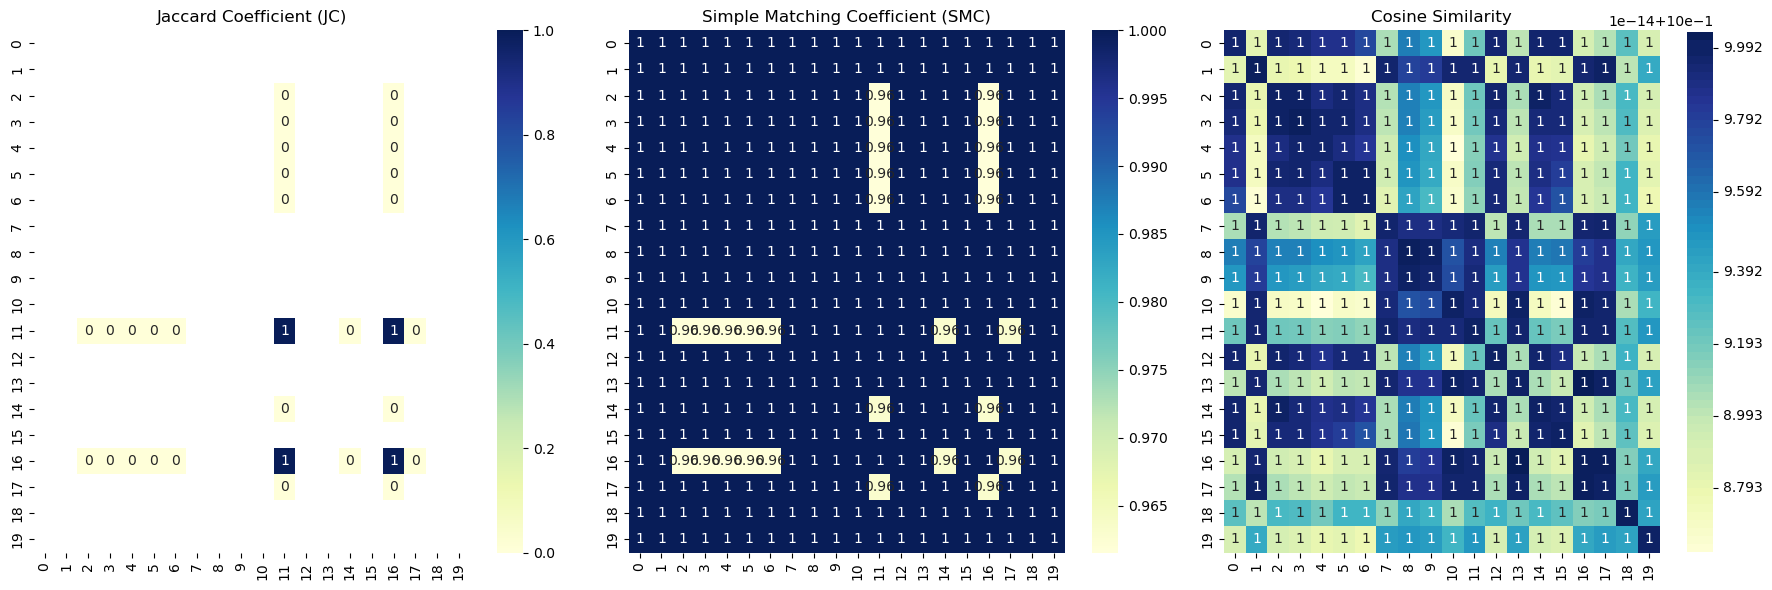

In [30]:
#A10
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the file
file_path = r'Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

    # Convert all columns to numeric, forcing errors to NaN (Not a Number)
    df = df.apply(pd.to_numeric, errors='coerce')

    # Fill missing values with 0
    df = df.fillna(0)

    # Extract the first 20 rows
    subset_df = df.head(20)

    # Initialize similarity matrices
    n = subset_df.shape[0]
    jc_matrix = np.zeros((n, n))
    smc_matrix = np.zeros((n, n))
    cosine_matrix = np.zeros((n, n))

    # Calculate Jaccard Coefficient (JC), Simple Matching Coefficient (SMC), and Cosine Similarity
    for i in range(n):
        for j in range(i, n):
            vector1 = subset_df.iloc[i].values
            vector2 = subset_df.iloc[j].values

            # Jaccard Coefficient (JC) for binary attributes
            binary_cols = (vector1 == 0) | (vector1 == 1)  # Ensure columns are binary
            f11 = np.sum((vector1[binary_cols] == 1) & (vector2[binary_cols] == 1))
            f10 = np.sum((vector1[binary_cols] == 1) & (vector2[binary_cols] == 0))
            f01 = np.sum((vector1[binary_cols] == 0) & (vector2[binary_cols] == 1))
            jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) > 0 else float('nan')
            jc_matrix[i, j] = jc
            jc_matrix[j, i] = jc  # Symmetric matrix

            # Simple Matching Coefficient (SMC) for binary attributes
            f00 = np.sum((vector1[binary_cols] == 0) & (vector2[binary_cols] == 0))
            smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) > 0 else float('nan')
            smc_matrix[i, j] = smc
            smc_matrix[j, i] = smc  # Symmetric matrix

            # Cosine Similarity
            dot_product = np.dot(vector1, vector2)
            norm_vector1 = np.linalg.norm(vector1)
            norm_vector2 = np.linalg.norm(vector2)
            cosine_similarity = dot_product / (norm_vector1 * norm_vector2) if norm_vector1 > 0 and norm_vector2 > 0 else float('nan')
            cosine_matrix[i, j] = cosine_similarity
            cosine_matrix[j, i] = cosine_similarity  # Symmetric matrix

    # Plot heatmaps
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.heatmap(jc_matrix, annot=True, cmap='YlGnBu', ax=axes[0])
    axes[0].set_title('Jaccard Coefficient (JC)')

    sns.heatmap(smc_matrix, annot=True, cmap='YlGnBu', ax=axes[1])
    axes[1].set_title('Simple Matching Coefficient (SMC)')

    sns.heatmap(cosine_matrix, annot=True, cmap='YlGnBu', ax=axes[2])
    axes[2].set_title('Cosine Similarity')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")
